In [ ]:
!pip install fredapi > /dev/null

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
fred_key = '65192491844ba8dca6e437cb188ba2c1'

# Create The Fred Object

In [8]:
fred = Fred(api_key = fred_key)

# Search For Economic data!

In [10]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [13]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-06-21   2023-06-21   
CSUSHPINSA          CSUSHPINSA     2023-06-21   2023-06-21   
SP500                    SP500     2023-06-21   2023-06-21   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-06-21   2023-06-21   
CSUSHPISA            CSUSHPISA     2023-06-21   2023-06-21   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-06-19  Daily, Close   
CSUSHPINSA            1987-01-01      2023-03-01       Monthly   
SP500                 2013-06-21      2023-06-20  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-06-19  Daily, Close   
CSUSHPISA             1987-01-01      2023-03-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-06-20 09:25:06-05:00         94   
CSUSHPINSA      2023-05-30 09:01:01-05:00         90   
SP500           2023-06-20 19:10:56-05:00         83   
BAMLH0A0HYM2EY  2023-06-20 09:25:10-05:00         83   
CSUSHPISA       2023-05-30 09:01:04-05:00         80   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
CSUSHPISA       For more information regarding the index, plea...

# Pull Raw Data & plot

In [16]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

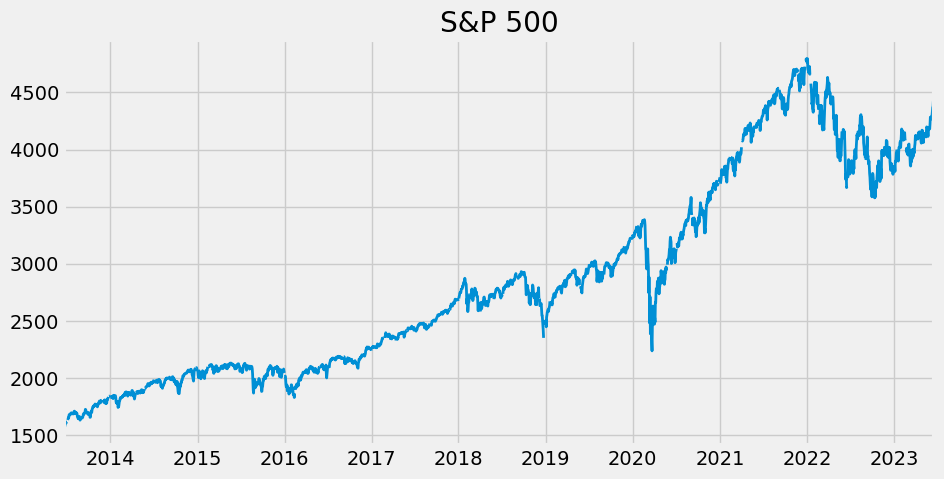

In [20]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# Pull and join multiple datasets

In [45]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [72]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis = 1)
uemp_results

UNRATE  LNS14000006  CAUR  M0892AUSM156SNBR  M0892BUSM156SNBR  \
1929-04-01     NaN          NaN   NaN              0.69               NaN   
1929-05-01     NaN          NaN   NaN              1.65               NaN   
1929-06-01     NaN          NaN   NaN              2.06               NaN   
1929-07-01     NaN          NaN   NaN              0.79               NaN   
1929-08-01     NaN          NaN   NaN              0.04               NaN   
...            ...          ...   ...               ...               ...   
2023-01-01     3.4          5.4   4.2               NaN               NaN   
2023-02-01     3.6          5.7   4.4               NaN               NaN   
2023-03-01     3.5          5.0   4.4               NaN               NaN   
2023-04-01     3.4          4.7   4.5               NaN               NaN   
2023-05-01     3.7          5.6   4.5               NaN               NaN   

            FLUR  TXUR  NYUR  LNS14000002  LNS14000031  U2RATE  LNS14000009  \
1929-04-01   NaN   NaN   NaN          NaN          NaN     NaN          NaN   
1929-05-01   NaN   NaN   NaN          NaN          NaN     NaN          NaN   
1929-06-01   NaN   NaN   NaN          NaN          NaN     NaN          NaN   
1929-07-01   NaN   NaN   NaN          NaN          NaN     NaN          NaN   
1929-08-01   NaN   NaN   NaN          NaN          NaN     NaN          NaN   
...          ...   ...   ...          ...          ...     ...          ...   
2023-01-01   2.6   3.9   4.2          3.3          5.3     1.5          4.5   
2023-02-01   2.6   4.0   4.2          3.5          5.1     1.7          5.3   
2023-03-01   2.6   4.0   4.1          3.4          5.2     1.8          4.6   
2023-04-01   2.6   4.0   4.0          3.3          4.5     1.6          4.4   
2023-05-01   2.6   4.1   3.9          3.6          5.6     1.8          4.0   

            OHUR  MIUR  LNS14000024  LNS14000003  LNS14027662  LNS14000001  \
1929-04-01   NaN   NaN          NaN          NaN          NaN          NaN   
1929-05-01   NaN   NaN          NaN          NaN          NaN          NaN   
1929-06-01   NaN   NaN          NaN          NaN          NaN          NaN   
1929-07-01   NaN   NaN          NaN          NaN          NaN          NaN   
1929-08-01   NaN   NaN          NaN          NaN          NaN          NaN   
...          ...   ...          ...          ...          ...          ...   
2023-01-01   4.0   4.3          3.2          3.1          2.0          3.6   
2023-02-01   3.9   4.3          3.3          3.2          2.0          3.6   
2023-03-01   3.8   4.1          3.2          3.2          2.0          3.6   
2023-04-01   3.7   3.8          3.2          3.1          1.9          3.5   
2023-05-01   3.6   3.7          3.4          3.3          2.1          3.7   

            ILUR  LNS14027660  LNS14024887  ALUR  MAUR  MNUR  NJUR  PAUR  \
1929-04-01   NaN          NaN          NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN          NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN          NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN          NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN          NaN   NaN   NaN   NaN   NaN   NaN   
...          ...          ...          ...   ...   ...   ...   ...   ...   
2023-01-01   4.5          3.7          8.0   2.6   3.5   2.9   3.4   4.3   
2023-02-01   4.5          3.6          8.1   2.5   3.7   3.0   3.5   4.4   
2023-03-01   4.4          4.0          7.5   2.3   3.5   2.8   3.5   4.2   
2023-04-01   4.2          3.9          6.5   2.2   3.1   2.8   3.5   4.1   
2023-05-01   4.1          3.9          7.4   2.2   2.8   2.9   3.6   4.0   

            NCUR  LRUN64TTUSM156S  WVUR  COUR  GAUR  KYUR  NMUR  LNS14027659  \
1929-04-01   NaN              NaN   NaN   NaN   NaN   NaN   NaN          NaN   
1929-05-01   NaN              NaN   NaN   NaN   NaN   NaN   NaN          NaN   
1929-06-01   NaN              NaN   NaN   NaN   

In [115]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [116]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [117]:
px.line(uemp_states)

# Pull May 2020 Unemployment Rate per state

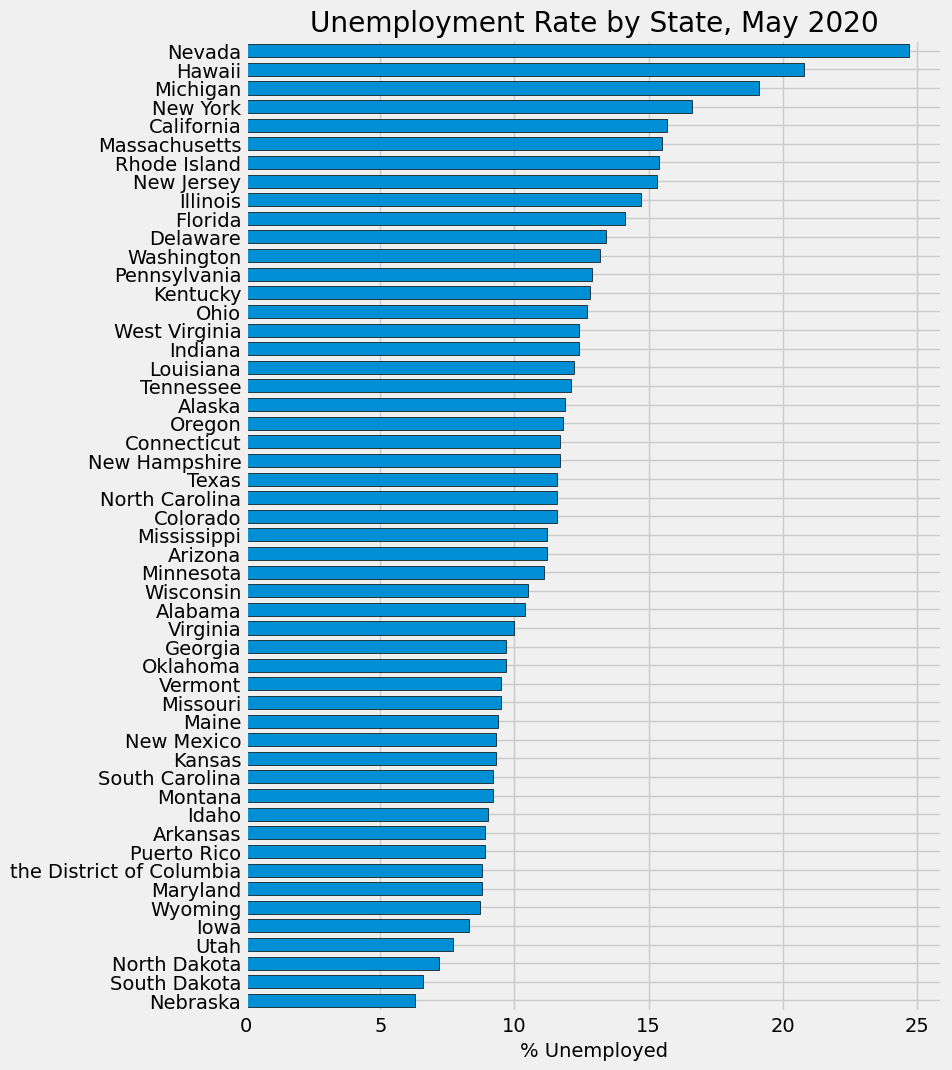

In [124]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate

In [125]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent"')

In [137]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment Vs Participation

Text(0.5, 1.0, 'New York')

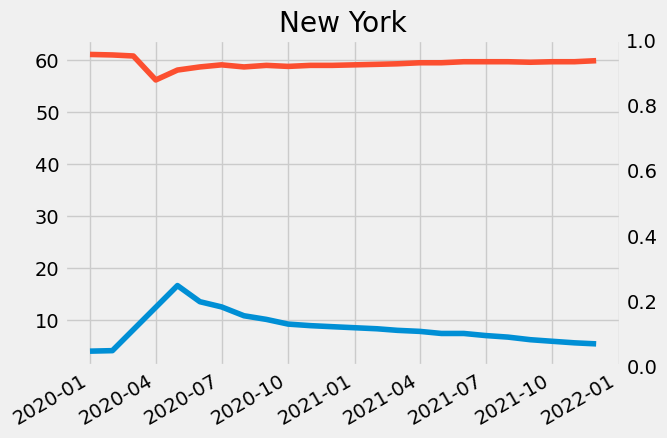

In [146]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
uemp_states.query('index >= 2020 and index < 2022 ')['New York'] \
    .plot(ax=ax, label = 'Unemployment')
part_states.query('index >= 2020 and index < 2022 ')['New York'] \
    .plot(ax=ax, label = 'Participation')
ax2.grid(False)
ax.set_title('New York')

In [150]:
uemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Michigan',
       'Illinois', 'Alabama', 'Massachusetts', 'Minnesota', 'New Jersey',
       'Pennsylvania', 'North Carolina', 'West Virginia', 'Colorado',
       'Georgia', 'Kentucky', 'New Mexico', 'Washington', 'Wisconsin',
       'Oklahoma', 'Virginia', 'Arizona', 'Missouri', 'Tennessee', 'Oregon',
       'South Carolina', 'Indiana', 'Kansas', 'Arkansas', 'Alaska',
       'Louisiana', 'Hawaii', 'Nevada', 'Utah', 'Iowa', 'Mississippi',
       'Maryland', 'Delaware', 'Connecticut', 'the District of Columbia',
       'New Hampshire', 'North Dakota', 'Montana', 'Rhode Island', 'Nebraska',
       'South Dakota', 'Puerto Rico', 'Wyoming', 'Maine', 'Idaho', 'Vermont'],
      dtype='object')

In [151]:
part_states.columns

Index(['Labor Force Participation Rate',
       'Labor Force Participation Rate - 25-54 Yrs.',
       'Labor Force Participation Rate - Women',
       'Labor Force Participation Rate - Men',
       'Labor Force Participation Rate - 55 Yrs. & over',
       'Labor Force Participation Rate - 16-19 Yrs.',
       'Labor Force Participation Rate - Black or African American',
       'Labor Force Participation Rate - 20-24 Yrs.',
       'Activity Rate: Aged 25-54: Males for the United States', 'California',
       ...
       'Inactivity Rate: Aged 25-54: All Persons for the United States',
       'Inactivity Rate: Aged 15 and Over: Males for the United States',
       'Activity Rate: Aged 15 and Over: Males for the United States',
       'Activity Rate: Aged 15 and Over: Females for the United States',
       'Inactivity Rate: Aged 15 and Over: Females for the United States',
       'Inactivity Rate: Aged 15-24: All Persons for the United States',
       'Inactivity Rate: Aged 15 and Over: All

In [152]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

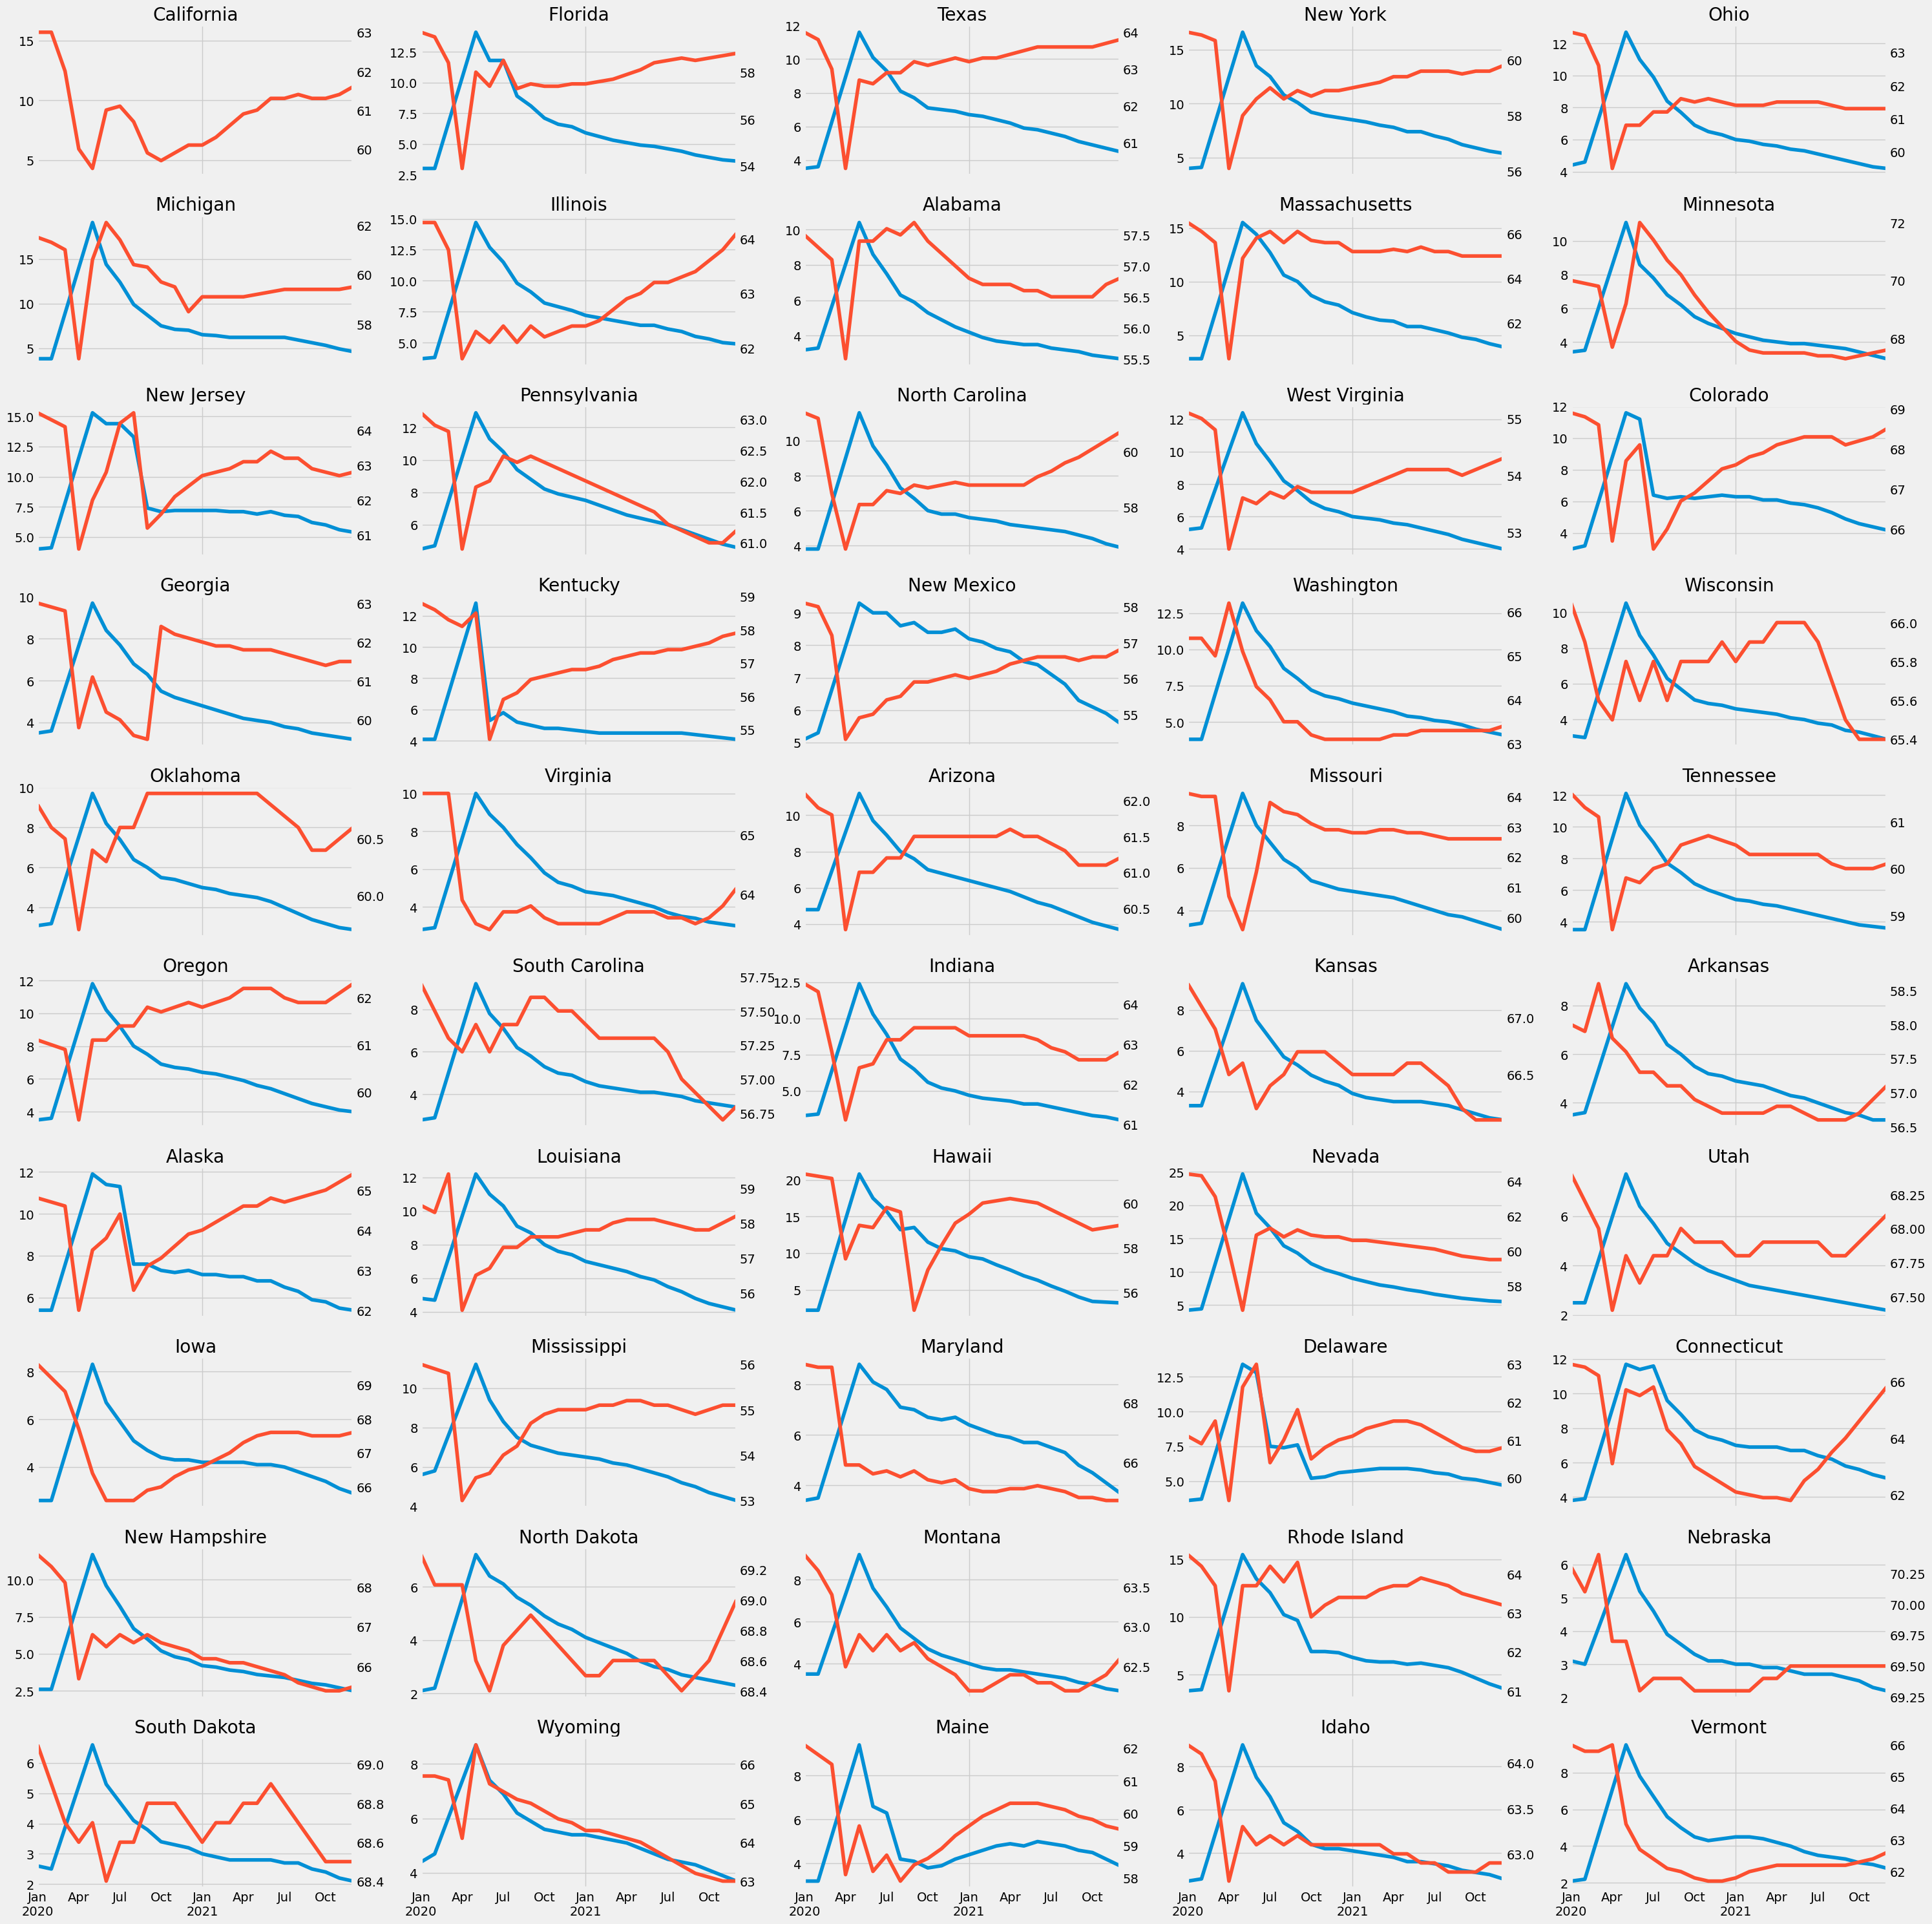

In [156]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()


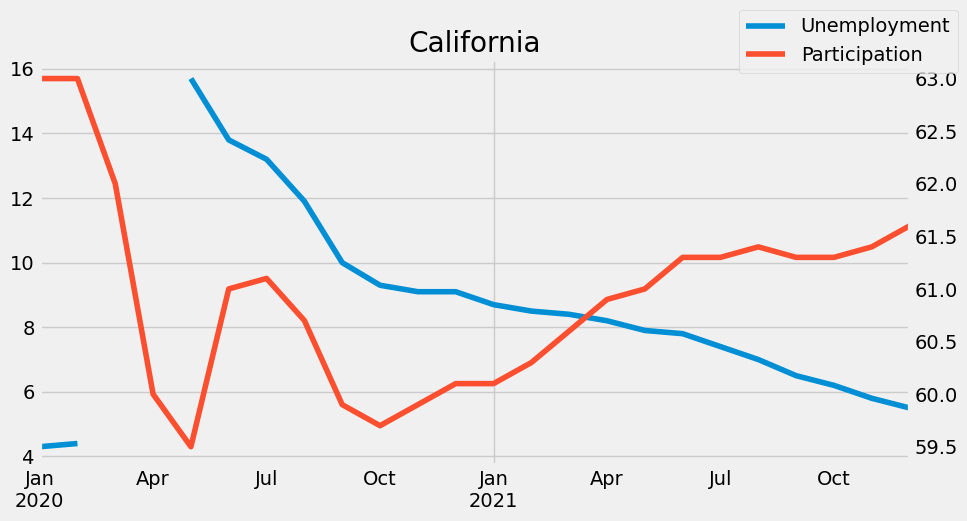

In [154]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()